In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **А.Загрузка и первичный обзор**

In [67]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

# Первые/последние строки
display(df.head())
display(df.tail())

# Структура данных
df.info()

# Проверка типов данных
print("\nТипы данных:")
print(df.dtypes)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB

Типы данных:
Person I

Типы данных корректны

###**В.Обработка данных**

In [68]:
# Поиск пропусков
missing_data = df.isnull().sum()
print("Пропущенные значения по столбцам:")
print(missing_data[missing_data > 0])

# Стратегия заполнения
# Пример: заполнение медианой для числовых признаков
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Заполнение модой для категориальных признаков
cat_cols = df.select_dtypes(include=['category', 'object']).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

Пропущенные значения по столбцам:
Sleep Disorder    219
dtype: int64


In [69]:
display(df.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sleep Apnea
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Заметим, что NaN'ы пропали после заполнения модой

In [70]:
# Поиск дубликатов
duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

Количество дубликатов: 0


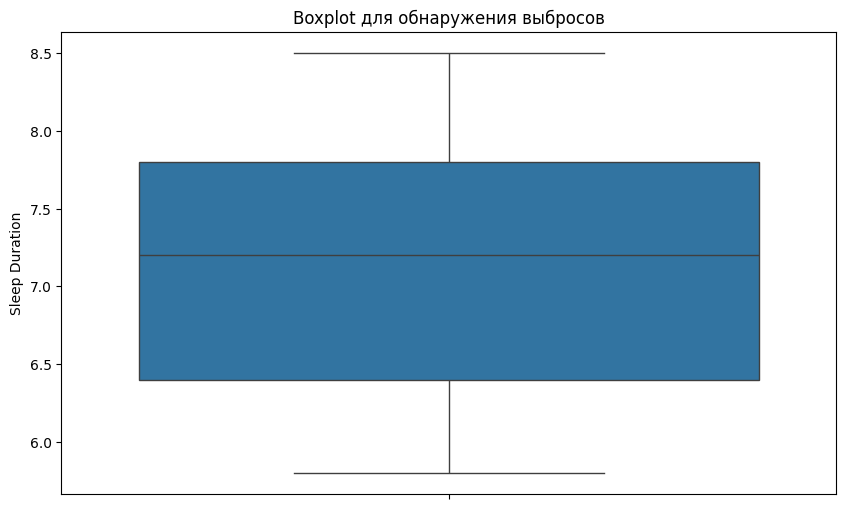

In [71]:
# Визуализация выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Sleep Duration'])
plt.title('Boxplot для обнаружения выбросов')
plt.show()

In [72]:
# Описательная статистика
print("\nОписательная статистика:")
display(df.describe(include='all'))

# Уникальные значения
print("\nУникальные значения для категориальных признаков:")
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")


Описательная статистика:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,374
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,2
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,Sleep Apnea
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,297
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN



Уникальные значения для категориальных признаков:
Gender: ['Male' 'Female']
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Sleep Disorder: ['Sleep Apnea' 'Insomnia']


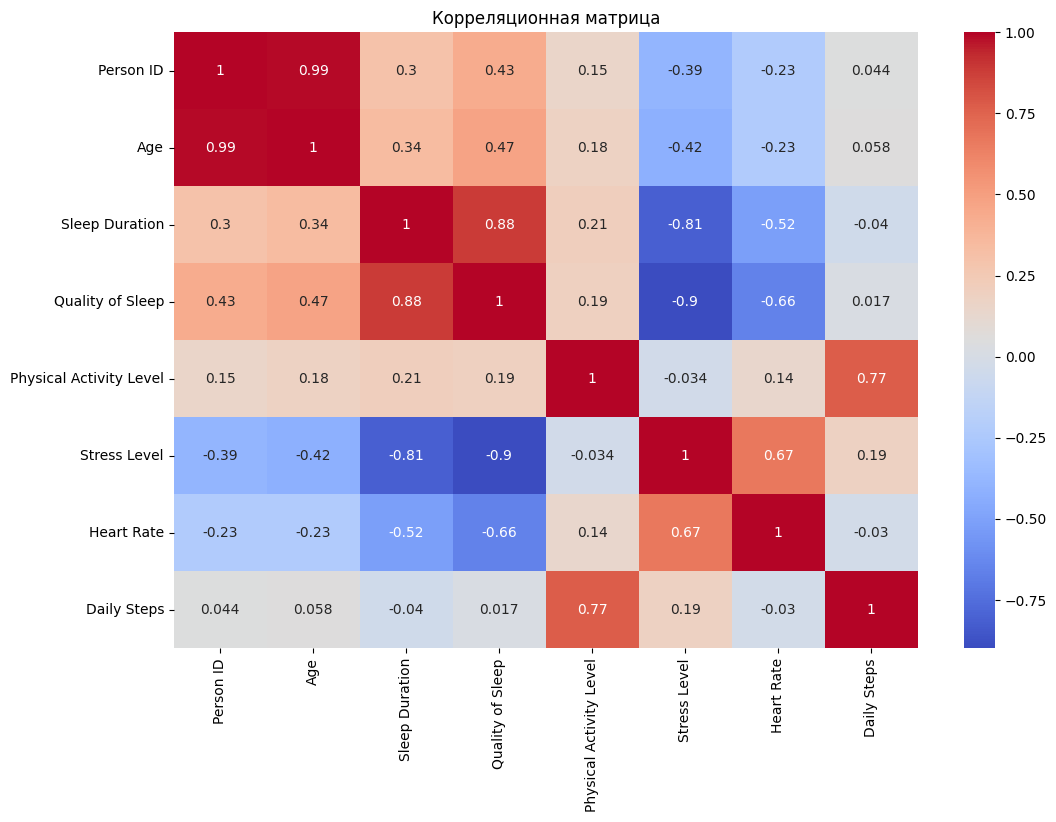

In [73]:
# Корреляционный анализ
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

### **С. Графики**

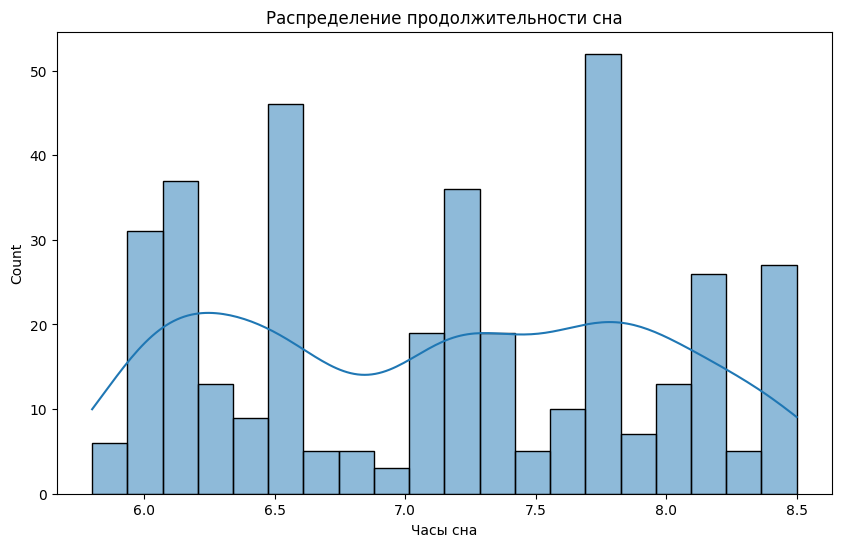

In [74]:
# 1. Гистограмма распределения продолжительности сна
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Duration'], bins=20, kde=True)
plt.title('Распределение продолжительности сна')
plt.xlabel('Часы сна')
plt.show()

/tmp/ipython-input-2672302933.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Physical Activity Level', y='Quality of Sleep', ci=None)


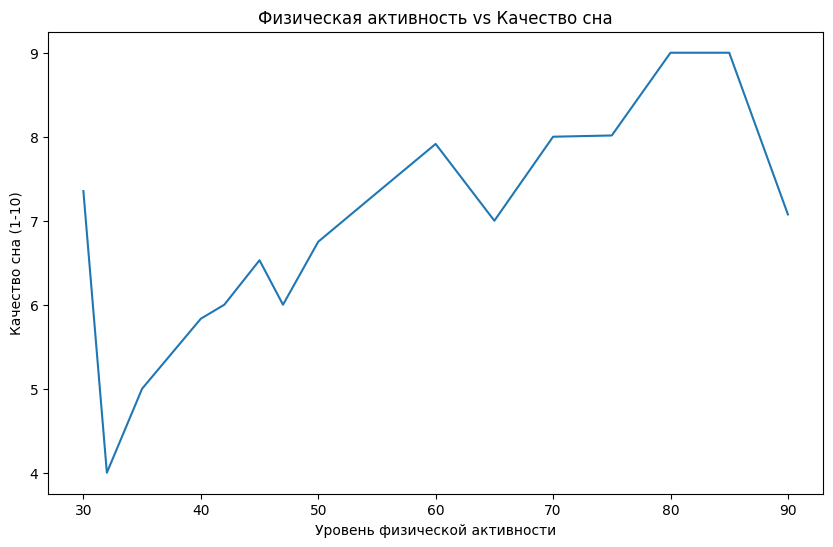

In [75]:
# 2. Линейный график: связь количества шагов в день и качества сна
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Physical Activity Level', y='Quality of Sleep', ci=None)
plt.title('Физическая активность vs Качество сна')
plt.xlabel('Уровень физической активности')
plt.ylabel('Качество сна (1-10)')
plt.show()

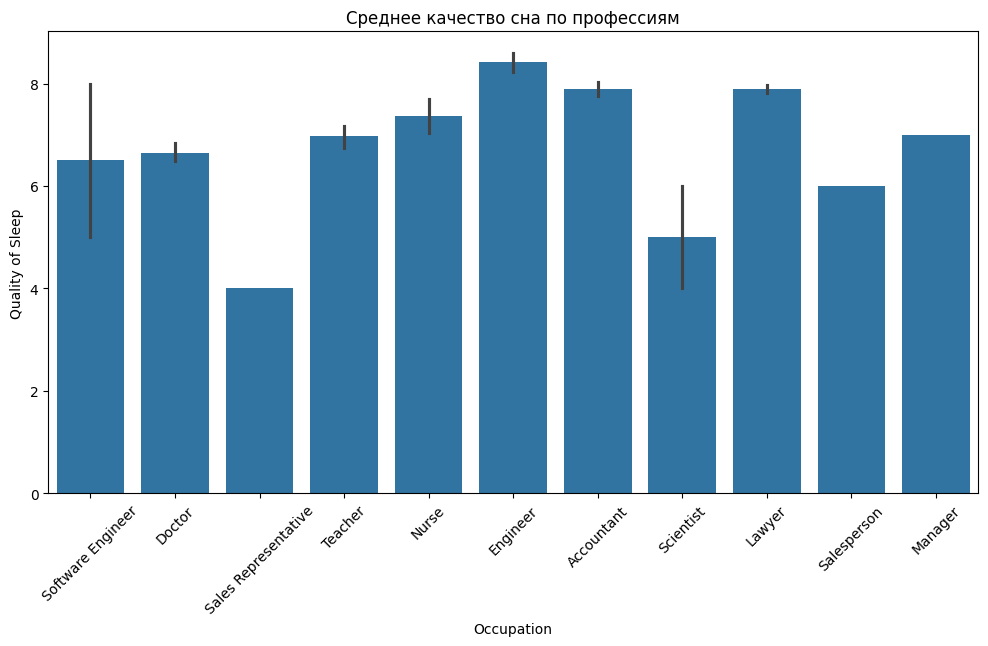

In [76]:
# 3. Столбчатая диаграмма: среднее качество сна по профессиям
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Occupation', y='Quality of Sleep', estimator=np.mean)
plt.title('Среднее качество сна по профессиям')
plt.xticks(rotation=45)
plt.show()

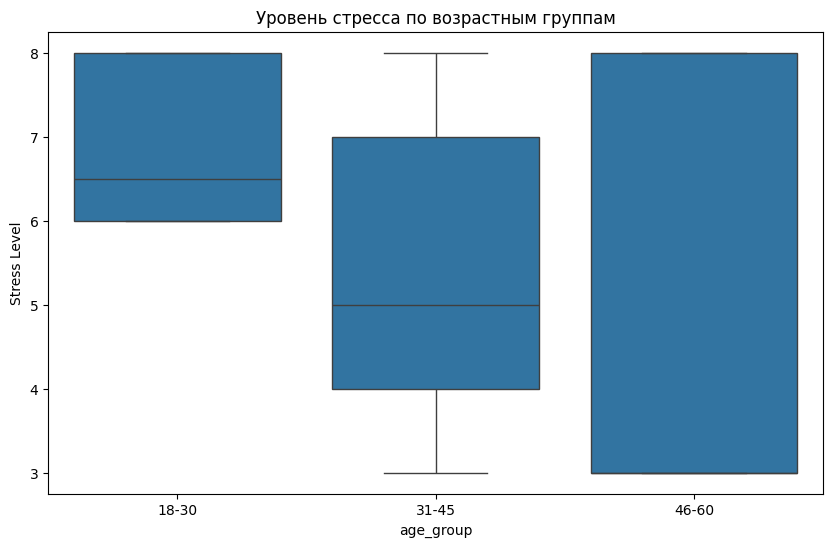

In [77]:
# 4. Boxplot: стресс по возрастным группам
df['age_group'] = pd.cut(df['Age'], bins=[18, 30, 45, 60], labels=['18-30', '31-45', '46-60'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group', y='Stress Level')
plt.title('Уровень стресса по возрастным группам')
plt.show()

### **D. Группировки и агрегации**

In [78]:
# 1. Среднее качество сна по полу
gender_sleep = df.groupby('Gender')['Quality of Sleep'].mean()
print("\nСреднее качество сна по полу:")
print(gender_sleep)

# 2. Количество людей с высоким стрессом (>7) по профессиям
high_stress = df[df['Stress Level'] > 7]
stress_by_occupation = high_stress['Occupation'].value_counts()
print("\nКоличество людей с высоким стрессом по профессиям:")
print(stress_by_occupation)

# 3. Сводная таблица: физическая активность vs качество сна
pivot_table = pd.pivot_table(
    df,
    values='Physical Activity Level',
    index='Quality of Sleep',
    columns='Gender',
    aggfunc='mean'
)
print("\nСводная таблица (активность vs сон):")
display(pivot_table)


Среднее качество сна по полу:
Gender
Female    7.664865
Male      6.968254
Name: Quality of Sleep, dtype: float64

Количество людей с высоким стрессом по профессиям:
Occupation
Doctor                  33
Nurse                   32
Sales Representative     2
Scientist                2
Software Engineer        1
Name: count, dtype: int64

Сводная таблица (активность vs сон):


Gender,Female,Male
Quality of Sleep,,
4,32.000000,30.000000
5,37.500000,36.666667
6,84.108108,38.514706
7,45.270270,70.625000
8,60.138889,73.630137
9,54.710145,85.000000
